### Linear Regression Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read in the data
data = pd.read_csv('../data/data_new.csv')
data.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_renovated,city,decade_built
0,0,376000.0,3.0,2.00,1340,1384,3.0,0,3,0,Seattle,2000
1,1,800000.0,4.0,3.25,3540,159430,2.0,0,3,0,Carnation,2000
2,3,324000.0,3.0,2.25,998,904,2.0,0,3,0,Seattle,2000
3,4,549900.0,5.0,2.75,3060,7015,1.0,0,5,0,Seattle,1970
4,5,320000.0,3.0,2.50,2130,6969,2.0,0,3,0,Maple Valley,2000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3873 non-null   int64  
 1   price         3873 non-null   float64
 2   bedrooms      3873 non-null   float64
 3   bathrooms     3873 non-null   float64
 4   sqft_living   3873 non-null   int64  
 5   sqft_lot      3873 non-null   int64  
 6   floors        3873 non-null   float64
 7   waterfront    3873 non-null   int64  
 8   condition     3873 non-null   int64  
 9   yr_renovated  3873 non-null   int64  
 10  city          3873 non-null   object 
 11  decade_built  3873 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 363.2+ KB


In [4]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3873 non-null   float64
 1   bedrooms      3873 non-null   float64
 2   bathrooms     3873 non-null   float64
 3   sqft_living   3873 non-null   int64  
 4   sqft_lot      3873 non-null   int64  
 5   floors        3873 non-null   float64
 6   waterfront    3873 non-null   int64  
 7   condition     3873 non-null   int64  
 8   yr_renovated  3873 non-null   int64  
 9   city          3873 non-null   object 
 10  decade_built  3873 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 333.0+ KB


In [6]:
data_num = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
data_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,376000.0,3.0,2.00,1340,1384
1,800000.0,4.0,3.25,3540,159430
2,324000.0,3.0,2.25,998,904
3,549900.0,5.0,2.75,3060,7015
4,320000.0,3.0,2.50,2130,6969


In [7]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        3873 non-null   float64
 1   bedrooms     3873 non-null   float64
 2   bathrooms    3873 non-null   float64
 3   sqft_living  3873 non-null   int64  
 4   sqft_lot     3873 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 151.4 KB


#### Fitting a Model

In [8]:
from sklearn.model_selection import train_test_split

X = data_num.drop('price', axis = 1)
y = data_num['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import statsmodels.api as sm

First, we are going to fit the model using statsmodels since they have a nice summary. 

In [11]:
# first, add a constant that will be the intercept term
X_train_sm = sm.add_constant(X_train)

# fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     549.9
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:25   Log-Likelihood:                -41634.
No. Observations:                3098   AIC:                         8.328e+04
Df Residuals:                    3093   BIC:                         8.331e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.846e+05   1.22e+04     15.079      

### Notes on Summary

There are a few things we see here. The predictors account for roughly 42% of the variablility since that is the R^2 value. The constant value of 1.846e+05 means each home starts out at $184600. Surprisingly, each additional bedroom has a neddagive association and drops the price $29130. Bathrooms ad $19,700 and each additional square foot add $179 so every 100 square feet adds $17,900. None of the confidence intervals contain a 0 so all of the predictors are statistically significant.

#### Checking the Assumptions

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [21]:
# function to calculate residuals
def residuals(model, features, target):
    '''Get residuals from given model.'''
    predictions = model.predict(features)

    # dataframe of actual and predicted
    results = pd.DataFrame({'Actual': target, 'Predictions': predictions})

    # add residuals
    results['residuals'] = results['Actual'] - results['Predictions']

    return results

In [22]:
y_train

691      482000.0
2183     540000.0
416      588000.0
1226     590000.0
217     1058000.0
          ...    
1130     289950.0
1294     930000.0
860      415000.0
3507     232500.0
3174     255000.0
Name: price, Length: 3098, dtype: float64

In [23]:
residuals(model=model, features = X_train_sm, target = y_train)

,Actual,Predictions,residuals
691,482000.0,480542.467725,1457.532275
2183,540000.0,482709.151292,57290.848708
416,588000.0,503565.754369,84434.245631
1226,590000.0,558577.783483,31422.216517
217,1058000.0,515065.187574,542934.812426
...,...,...,...
1130,289950.0,497047.738671,-207097.738671
1294,930000.0,653105.876468,276894.123532
860,415000.0,406391.197255,8608.802745
3507,232500.0,471917.239298,-239417.239298


In [35]:
import plotly.express as px
import plotly.graph_objects as go
# check for linearity
def linear_assumption(model, features, target):
    # get residuals for the plot
    residuals_df = residuals(model, features, target)

    # plot them
    fig = px.scatter(data_frame = residuals_df, x = 'Actual', y = 'Predictions')
    # plot horizontal line
    # Add the diagonal line (ideal line where y = x)
    min_val = min(residuals_df['Actual'].min(), residuals_df['Predictions'].min())
    max_val = max(residuals_df['Actual'].max(), residuals_df['Predictions'].max())
    fig.add_trace(go.Scatter(x=[min_val, max_val], y=[min_val, max_val], mode='lines', line=dict(color='red', dash='dash'), name= 'Ideal Line'))
    fig.show()

In [36]:
linear_assumption(model, X_train_sm, y_train)

In [44]:
#  plot the residuals vs fitted
def fitted_residuals_plot(model, features, target):
    # get residuals 
    residuals_df = residuals(model, features, target)
    # plot predicted on x and residuals on y
    fig = px.scatter(data_frame=residuals_df, x = 'Predictions', y = 'residuals')
    fig.show()



In [45]:
fitted_residuals_plot(model, X_train_sm, y_train)

#### Testing if Expected Error is 0

In [48]:
# seems to be 0
np.mean(model.resid)

np.float64(1.2009792400222197e-08)

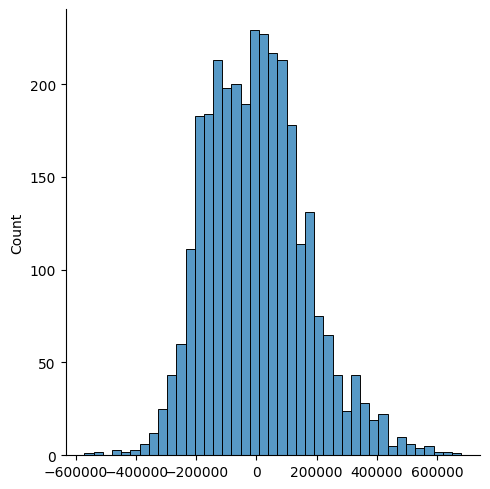

In [49]:
import seaborn as sns
sns.displot(model.resid)